In [15]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [3]:
# Importing dataset
train_dir = "../data/dataset/train"
validation_dir = "../data/dataset/validation"

# Rescales the images
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(150,150), batch_size=32, class_mode='categorical')



Found 14523 images belonging to 10 classes.
Found 2719 images belonging to 10 classes.


In [10]:
# CNN Model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.6))
model.add(layers.Dense(256, activation='relu' ,kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 256)      

In [11]:
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-3),
metrics=['acc'])

In [12]:
# fit generator
history = model.fit_generator(
    train_generator,
    steps_per_epoch=230,
    epochs=105,
    validation_data=validation_generator,
    validation_steps=43)

Epoch 1/105
230/230 [==============================] - 124s 536ms/step - loss: 2.1005 - acc: 0.3794 - val_loss: 1.1506 - val_acc: 0.6940
Epoch 2/105
230/230 [==============================] - 139s 606ms/step - loss: 0.9854 - acc: 0.7442 - val_loss: 0.7773 - val_acc: 0.8212
Epoch 3/105
230/230 [==============================] - 145s 629ms/step - loss: 0.8376 - acc: 0.7913 - val_loss: 0.7622 - val_acc: 0.8249
Epoch 4/105
230/230 [==============================] - 146s 632ms/step - loss: 0.7388 - acc: 0.8315 - val_loss: 0.6134 - val_acc: 0.8619
Epoch 5/105
230/230 [==============================] - 142s 619ms/step - loss: 0.6641 - acc: 0.8541 - val_loss: 0.6751 - val_acc: 0.8430
Epoch 6/105
230/230 [==============================] - 129s 561ms/step - loss: 0.6159 - acc: 0.8648 - val_loss: 0.5314 - val_acc: 0.8961
Epoch 7/105
230/230 [==============================] - 128s 556ms/step - loss: 0.5667 - acc: 0.8777 - val_loss: 0.5027 - val_acc: 0.9055
Epoch 8/105
230/230 [====================

### Saving model

In [13]:

model.save('../model/tomato_disease_classifier.h5')

### Model testing

In [17]:
test_dir = '../data/dataset/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 903 images belonging to 10 classes.


In [24]:
score = model.evaluate(test_generator, steps=28, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

In [25]:
print(score)

[0.1664065569639206, 0.9776785969734192]


# Model Metrics

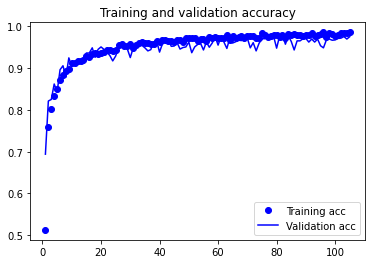

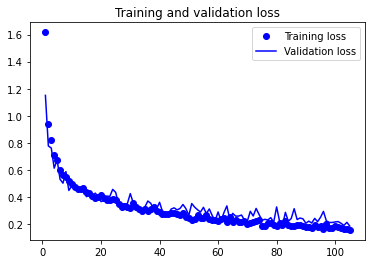

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()